# Tasks

Dataset collection – Download the main Steam Reviews dataset (and optionally the other ones if needed).

Tag collection – Gather the complete set of Steam tags (either from a list or by extracting tags attached to games in your dataset).

Data cleaning & preprocessing – Remove duplicates, filter uninformative reviews (“very good game”), normalize text (tokenization, lowercasing, stopword removal, etc.).

Dataset integration – Ensure reviews and tags are linked to the same games; build a consistent structure combining review text and game tags.

Exploratory data analysis – Inspect distribution of reviews per game, most frequent tags, review length, balance between positive/negative reviews, etc.

Baseline method implementation – Train Word2Vec embeddings per game and compute cosine similarity between reviews and tag embeddings.

Advanced modeling – Experiment with alternative methods (e.g., supervised learning, other embedding models, feature importance analysis).

Evaluation design – Decide on the scoring system (exact match vs. order-sensitive comparison of tags with Steam’s official tag list).

Evaluation & analysis – Run the models, compare outputs against Steam’s tags, and analyze results (per game and overall).

Reporting & discussion – Interpret findings in terms of your research questions (correlation of reviews and tags, best features for tag extraction).

1. Getting Data

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("./archive/dataset.csv")
df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [6]:
gameNames = df["app_name"].unique()
gameCodes = df["app_id"].unique()

print(gameNames.shape)
print(gameCodes.shape)

(9364,)
(9972,)


In [10]:
print(df["review_text"].shape[0])
df.loc[df["review_text"].str.split().str.len() > 3, "review_text"].shape[0]

6417106


5126570

In [11]:
df["word_count"] = df["review_text"].str.split().str.len()

bins   = [0, 3, 5, 10, 15, 20, 30, float("inf")]
labels = ["≤3", "4–5", "6–10", "11–15", "16–20", "21–30", "30+"]

counts = pd.cut(df["word_count"], bins=bins, labels=labels, right=True).value_counts().sort_index()

print(counts)


word_count
≤3       1283045
4–5       296477
6–10      719003
11–15     568744
16–20     432384
21–30     608413
30+      2501549
Name: count, dtype: int64


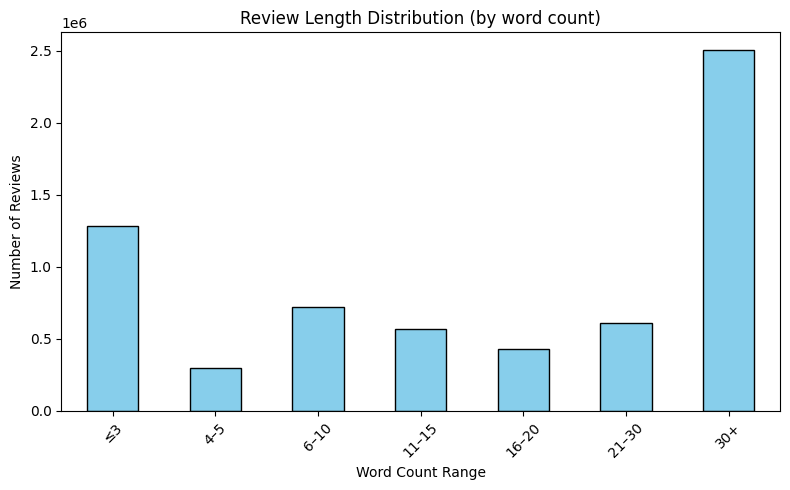

In [13]:
import matplotlib.pyplot as plt


# Plot
plt.figure(figsize=(8,5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Review Length Distribution (by word count)")
plt.xlabel("Word Count Range")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
